In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import itertools
import plotly.express as px

In [2]:
PATH = "NY-House-Dataset.csv"
COLUMNS_FOR_FACTORISATION = [
    # 'BROKERTITLE',
    # 'TYPE',
    # 'ADMINISTRATIVE_AREA_LEVEL_2',
    'LOCALITY',
    # 'SUBLOCALITY',
]
NUMERIC_COLUMNS = [
    'PRICE',
    # 'BEDS',
    # 'BATH',
    # 'PROPERTYSQFT',
    'LATITUDE',
    'LONGITUDE',
]
COORDS = [
    'LATITUDE',
    'LONGITUDE',
]
COLUMNS = COLUMNS_FOR_FACTORISATION + NUMERIC_COLUMNS

dataset = pd.read_csv(PATH)
coords = dataset[COORDS]
dataset = dataset[COLUMNS]

factorization_table = {}
for column in COLUMNS:
    if column in COLUMNS_FOR_FACTORISATION:
        dataset[column], table = pd.factorize(dataset[column])
        factorization_table[column] = pd.DataFrame(
            columns=[column],
            data=table
        )
    if column in NUMERIC_COLUMNS:
        dataset[column] = pd.to_numeric(dataset[column])
        dataset[column] = (dataset[column] - dataset[column].mean())/dataset[column].std()

dataset.index = [index for index in range(len(dataset))]
dataset

LOCALITY     PRICE  LATITUDE  LONGITUDE
0            0 -0.065123  0.536386  -0.325301
1            0  6.143886  0.594994  -0.389679
2            0 -0.066877 -1.966591  -2.517819
3            0 -0.072968  0.538016  -0.326581
4            0  1.678924  0.604460  -0.279523
...        ...       ...       ...        ...
4796         1 -0.056065  0.685743  -0.141249
4797         0 -0.067355  0.208847   0.805774
4798         0 -0.034506  0.361043  -0.611346
4799         5 -0.056093  0.325557   0.681123
4800         3 -0.064038 -1.540681  -0.290333

[4801 rows x 4 columns]

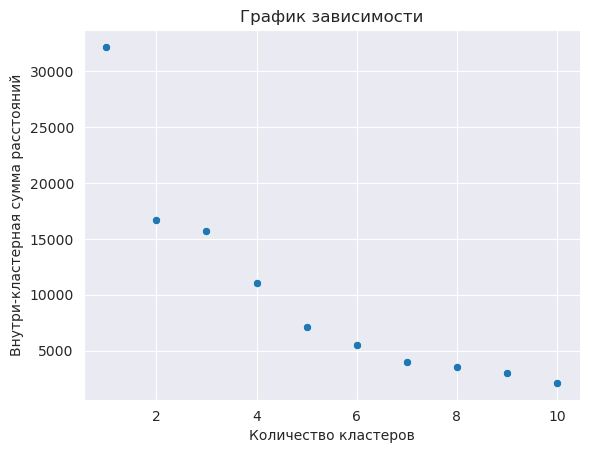

In [3]:
inertia = []
for i in range(1, 11):
    k_means = KMeans(n_clusters=i, init= 'k-means++')
    k_means.fit(dataset)
    inertia.append(k_means.inertia_)
    
sns.set_style('darkgrid')
sns.scatterplot(
    x=[x for x in range(1, 11)],
    y=inertia,
)
plt.title('График зависимости')
plt.xlabel('Количество кластеров')
plt.ylabel('Внутри-кластерная сумма расстояний')
plt.show()

In [4]:
CLUSTERS = 6
model = KMeans(
    n_clusters=CLUSTERS
)
model.fit(dataset)
clusters = pd.DataFrame(
    columns=dataset.columns,
    data=model.cluster_centers_
)
dataset['Cluster'] = model.predict(dataset)
dataset


LOCALITY     PRICE  LATITUDE  LONGITUDE  Cluster
0            0 -0.065123  0.536386  -0.325301        5
1            0  6.143886  0.594994  -0.389679        5
2            0 -0.066877 -1.966591  -2.517819        0
3            0 -0.072968  0.538016  -0.326581        5
4            0  1.678924  0.604460  -0.279523        5
...        ...       ...       ...        ...      ...
4796         1 -0.056065  0.685743  -0.141249        5
4797         0 -0.067355  0.208847   0.805774        4
4798         0 -0.034506  0.361043  -0.611346        5
4799         5 -0.056093  0.325557   0.681123        1
4800         3 -0.064038 -1.540681  -0.290333        2

[4801 rows x 5 columns]

In [5]:
for feat in factorization_table:
    dataset.replace(factorization_table[feat], inplace=True)

dataset[COORDS] = coords

clusters["Amount"] = np.unique(
    model.labels_,
    return_counts=True
)[1]
clusters

LOCALITY      PRICE  LATITUDE  LONGITUDE  Amount
0 -4.440892e-16  -0.033967 -1.306950  -1.197096     909
1  4.912102e+00  -0.060402  0.579006   0.831777     785
2  3.366224e+00  -0.048918 -0.869420  -0.461087     527
3  0.000000e+00  68.413646 -2.232583  -2.797886       1
4 -1.332268e-15  -0.040827  0.271500   0.961724    1133
5  6.849030e-01   0.056765  0.617781  -0.278335    1446

In [6]:
fig = px.scatter_mapbox(dataset, lat='LATITUDE', lon='LONGITUDE', color='Cluster', )
fig.update_layout(mapbox_style="open-street-map")
fig.show()